In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Data Collection and Analysis

In [2]:
#loading data from dataset
insurance_dataset=pd.read_csv('data/insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_dataset.shape

(1338, 7)

In [6]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features:
- Sex
- smoker
- region

In [7]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis


In [8]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0.5, 1.0, 'Age distribution')

<Figure size 600x600 with 0 Axes>

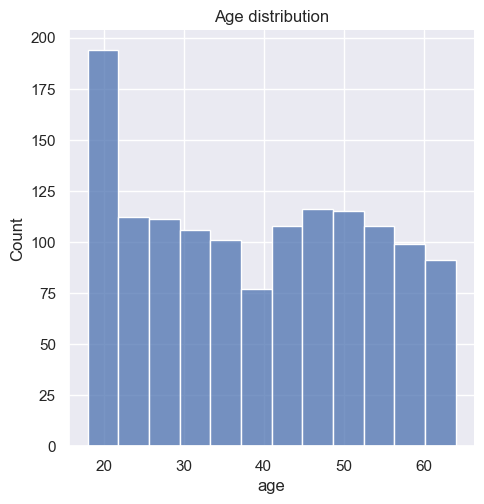

In [12]:
# age distribution
sns.set()
plt.figure(figsize = (6,6))
sns.displot(insurance_dataset['age'])
plt.title('Age distribution')

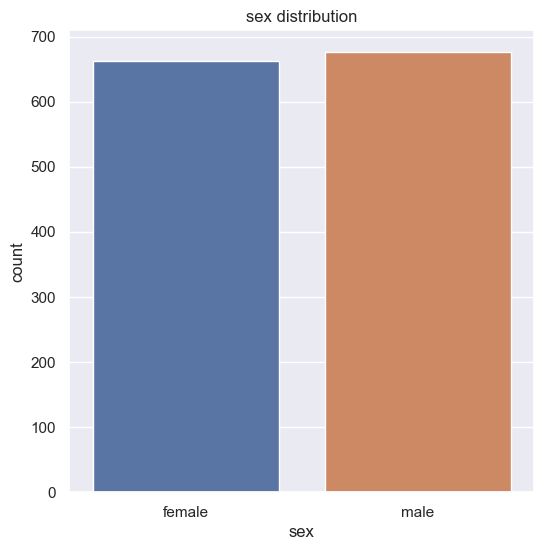

In [14]:
# gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex', data = insurance_dataset)
plt.title('sex distribution')
plt.show()

In [15]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\malak\AppData\Local\Temp\ipykernel_35832\652242790.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


Text(0.5, 1.0, 'BMI distribution')

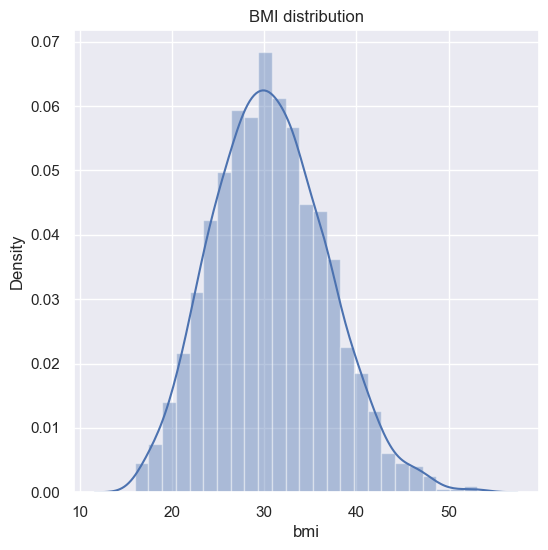

In [18]:
# bmi distribution
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI distribution')

Normal BMI range : from 18.5 ro 24.9

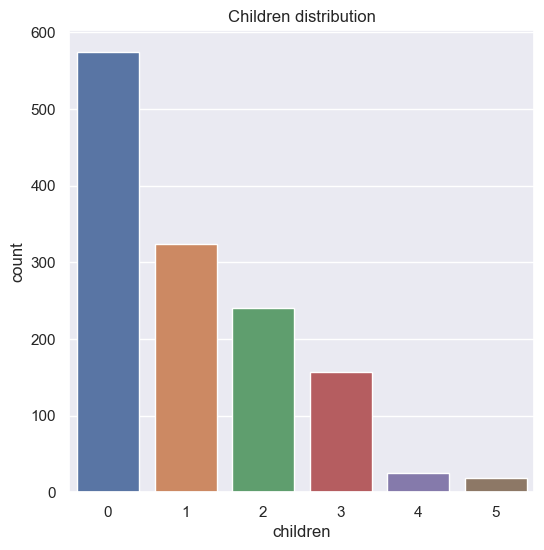

In [19]:
# Children column
plt.figure(figsize = (6,6))
sns.countplot(x = 'children', data = insurance_dataset)
plt.title('Children distribution')
plt.show()

In [20]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

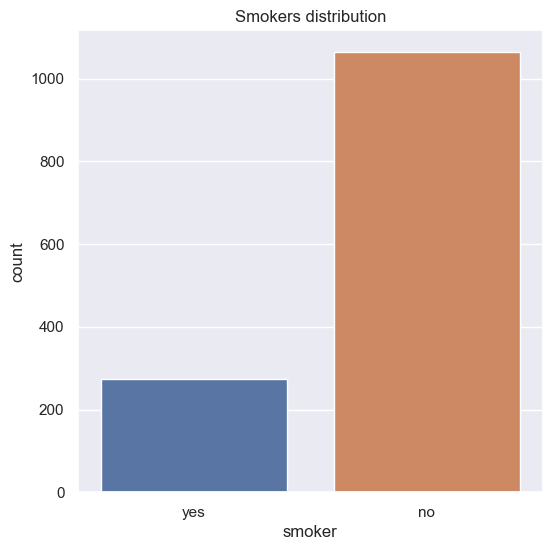

In [21]:

# Smoker column
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker', data = insurance_dataset)
plt.title('Smokers distribution')
plt.show()

In [22]:
insurance_dataset['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

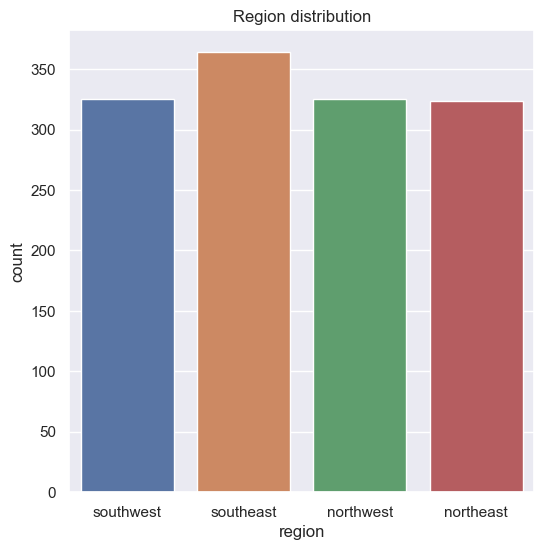

In [23]:
# Region column
plt.figure(figsize = (6,6))
sns.countplot(x = 'region', data = insurance_dataset)
plt.title('Region distribution')
plt.show()

In [24]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Text(0.5, 1.0, 'Charges distribution')

<Figure size 600x600 with 0 Axes>

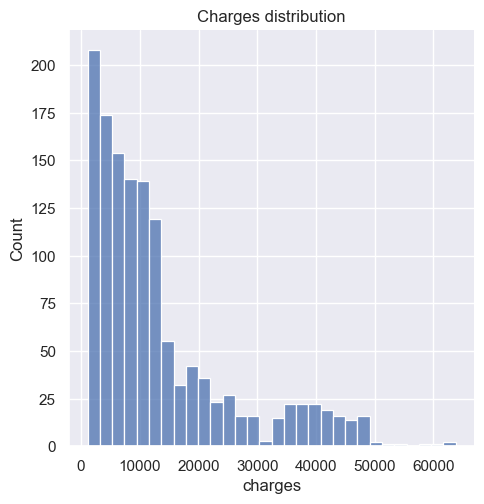

In [25]:
# Charges distribution
sns.set()
plt.figure(figsize = (6,6))
sns.displot(insurance_dataset['charges'])
plt.title('Charges distribution')

Data Pre-Processing

Encoding Categorical features

In [26]:
#encoding sex Column
insurance_dataset.replace({'sex':{'male': 0, 'female': 1}}, inplace = True)

In [27]:
#encoding smoker Column
insurance_dataset.replace({'smoker':{'no': 0, 'yes': 1}}, inplace = True)

In [28]:
#encoding region Column
insurance_dataset.replace({'region':{'southeast': 0, 'southwest': 1, 'northeast': 2, 'northwest': 3}}, inplace = True)

In [30]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,2,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


Splitting features and Target

In [31]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [32]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [33]:
print(Y)


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Split data into training data and testing data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training : LInear Regression

In [38]:
# loading the linear regression model
regressor = LinearRegression()

In [39]:
regressor.fit(X_train, Y_train)

LinearRegression()

Model evaluation

In [40]:
training_data_prediction  = regressor.predict(X_train)

In [41]:
# R squared value
r2_train  = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value = ', r2_train)

R squared value =  0.751505643411174


In [42]:
#prediction on test data
test_data_prediction  = regressor.predict(X_test)

In [43]:
# R squared value
r2_test  = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value = ', r2_test)

R squared value =  0.7447273869684077


Build a predictive System

In [48]:
input_data = (31,1,25.74,0,0,0)

#change input data to np array
input_arr = np.asarray(input_data)

#reshape array
input_arr_reshaped = input_arr.reshape(1,-1)

prediction  = regressor.predict(input_arr_reshaped)

print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  3760.0805764960514


C:\Users\malak\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
